In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**DataCleaning**

In [ ]:
df = pd.read_csv ('E:\githubb\TungProject\CustomerSegment\Data\Mall_Customers.csv')



In [4]:
df.shape


(200, 5)

In [5]:
df.head ()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
df.describe() 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Data Analysis**

<Figure size 1500x500 with 0 Axes>

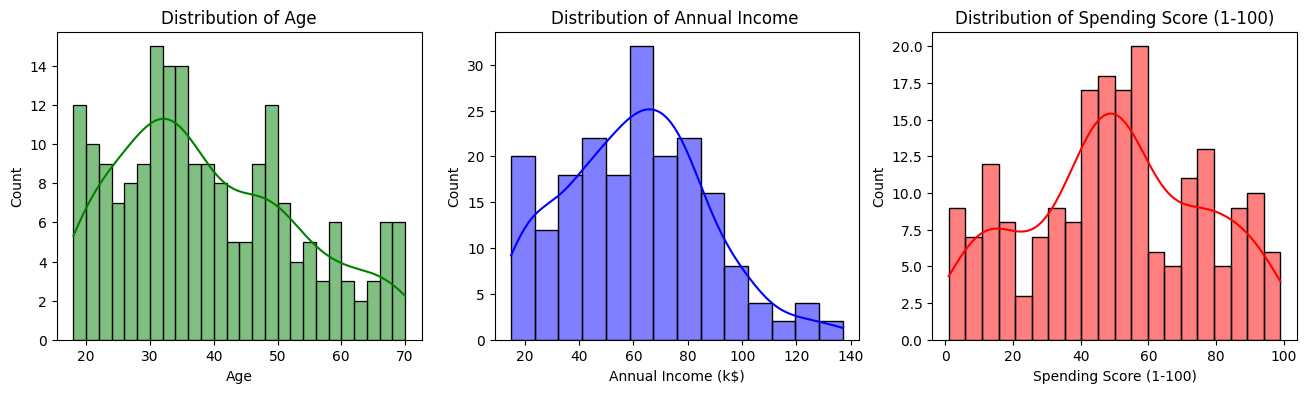

In [9]:
#Overall figure size
plt.figure (figsize=(15,5))
#Subplots : 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(16,4))
#Plot1: Age distribution
sns.histplot (df['Age'] , kde= True, bins = 26, ax = axes[0], color= 'g' )
axes[0].set_title ('Distribution of Age') 
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
#Plot2: Anual Income distribution
sns.histplot (df['Annual Income (k$)'] , kde= True, bins = 14, ax = axes[1],color= 'b' )
axes[1].set_title ('Distribution of Annual Income ') 
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Count')
#Plot2: Spending Score distribution
sns.histplot (df['Spending Score (1-100)'] , kde= True, bins = 20, ax = axes[2],color= 'r' )
axes[2].set_title ('Distribution of Spending Score (1-100)') 
axes[2].set_xlabel('Spending Score (1-100)')
axes[2].set_ylabel('Count')
plt.show()

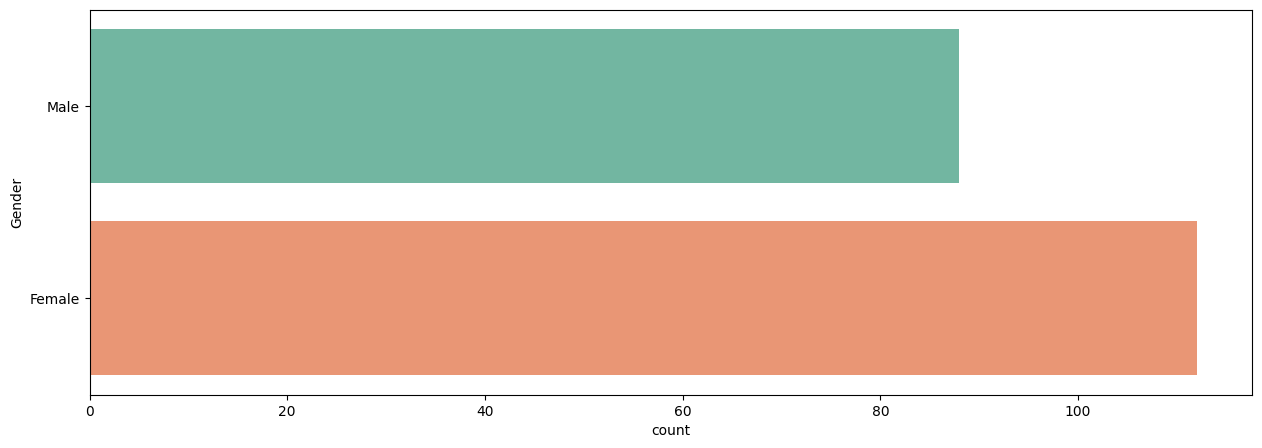

In [10]:
#Overall figure size
plt.figure (figsize=(15,5))
sns.countplot (data=df, y='Gender', hue='Gender', palette='Set2', legend=False)
plt.show()

<Figure size 1500x500 with 0 Axes>

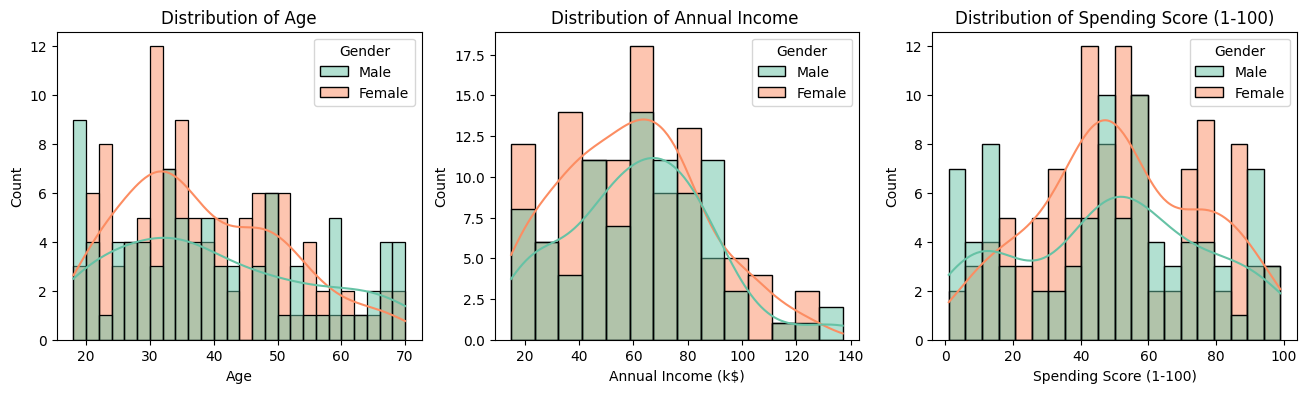

In [11]:
#Overall figure size
plt.figure (figsize=(15,5))
#Subplots : 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(16,4))
#Plot1: Age distribution for bot genders
sns.histplot (df, x = 'Age', hue ='Gender', kde= True, bins = 26, ax = axes[0], palette='Set2', )
axes[0].set_title ('Distribution of Age') 
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
#Plot2: Anual Income distribution for bot genders
sns.histplot (df, x = 'Annual Income (k$)' ,hue ='Gender', kde= True, bins = 14, ax = axes[1], palette='Set2' )
axes[1].set_title ('Distribution of Annual Income ') 
axes[1].set_xlabel('Annual Income (k$)')
axes[1].set_ylabel('Count')
#Plot2: Spending Score distribution for bot genders
sns.histplot (df , x = 'Spending Score (1-100)' , hue ='Gender', kde= True, bins = 20, ax = axes[2], palette='Set2' )
axes[2].set_title ('Distribution of Spending Score (1-100)') 
axes[2].set_xlabel('Spending Score (1-100)')
axes[2].set_ylabel('Count')
plt.show()

**Clustering using Kmeans**

Text(0, 0.5, 'WCSS')

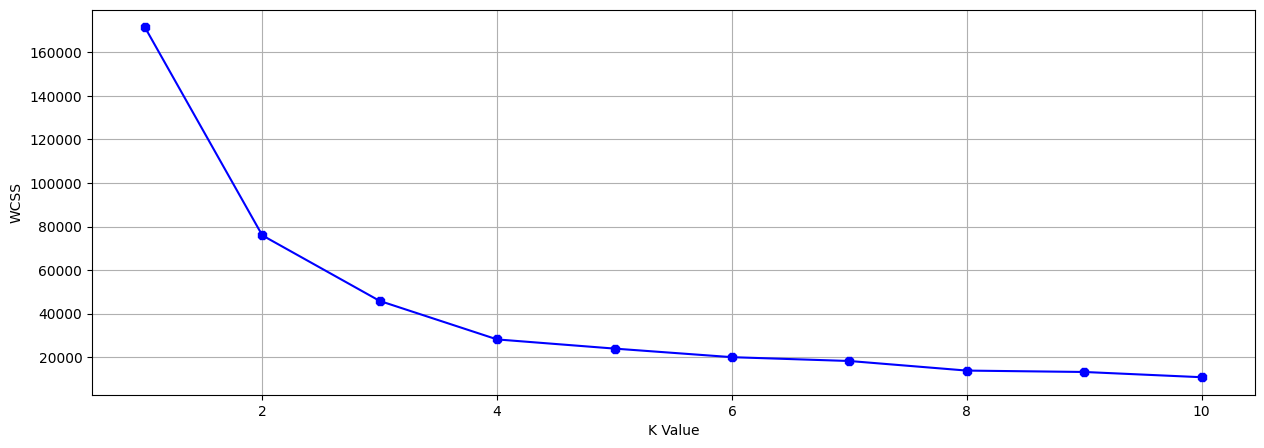

In [12]:
#Choose the number of clusters
wcss = []
for k in range (1,11) : 
    kmeans = KMeans (n_clusters = k, random_state= 42 )
    kmeans.fit (df[['Age' , 'Spending Score (1-100)']])
    wcss.append (kmeans.inertia_ ) 
plt.figure ( figsize= (15,5))
plt.grid ()
plt.plot ( range(1,11), wcss, marker = '8' , color = 'blue'   )
plt.xlabel ('K Value')
plt.ylabel ('WCSS')




**Trying both 4 and 5**

In [13]:
# K= 4
X1 = df.loc [ :, ['Age' , 'Spending Score (1-100)']].values 
kmeans = KMeans ( n_clusters= 4)
label = kmeans.fit_predict (X1)
print (label)


[3 1 0 1 3 1 0 1 0 1 0 1 0 1 0 1 3 3 0 1 3 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 3 0 3 2 3 3 3 2 3 3 2 2 2 2 2 3 2 2 3 2 2 2 3 2 2 3 3 2 2 2 2
 2 3 2 3 3 2 2 3 2 2 3 2 2 3 3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 2 3 2 2 2 2 2
 3 3 3 3 3 2 2 2 2 3 3 3 1 3 1 2 1 0 1 0 1 3 1 0 1 0 1 0 1 0 1 3 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [14]:
print (kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.40816327 48.04081633]
 [27.32608696 49.36956522]]


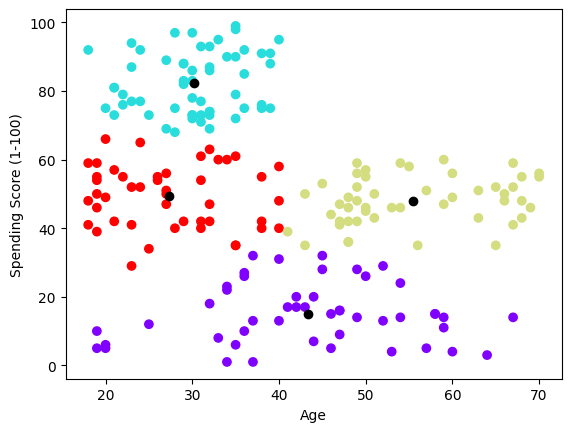

In [15]:
plt.scatter ( X1[ :,0] , X1 [ :, 1], c= kmeans.labels_, cmap= 'rainbow')
plt.scatter (kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1] , color = 'black' )
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

Text(0, 0.5, 'WCSS')

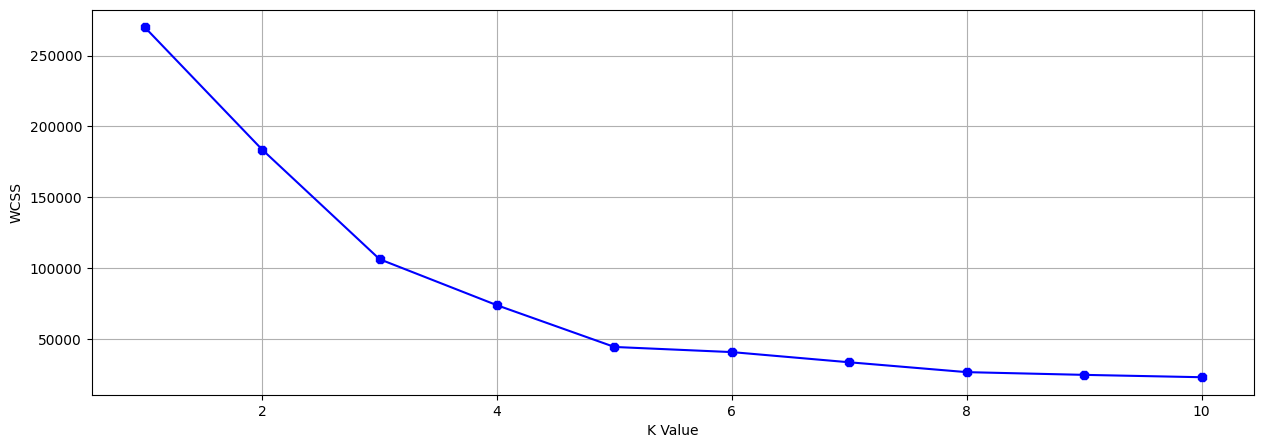

In [16]:
#Choose the number of clusters
X2 = df.loc [ :, ['Annual Income (k$)' , 'Spending Score (1-100)']].values 
wcss = []
for k in range (1,11) : 
    kmeans = KMeans (n_clusters = k, random_state= 42 )
    kmeans.fit (df[['Annual Income (k$)' , 'Spending Score (1-100)']])
    wcss.append (kmeans.inertia_ ) 
plt.figure ( figsize= (15,5))
plt.grid ()
plt.plot ( range(1,11), wcss, marker = '8' , color = 'blue'   )
plt.xlabel ('K Value')
plt.ylabel ('WCSS')


In [17]:
# K= 5
kmeans = KMeans ( n_clusters= 5)
label = kmeans.fit_predict (X2)
print (label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [18]:
print (kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


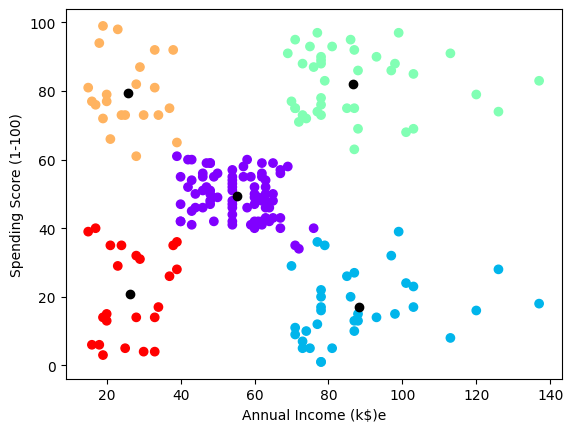

In [19]:
plt.scatter ( X2[:,0] , X2[:, 1], c= kmeans.labels_, cmap= 'rainbow')
plt.scatter (kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1] , color = 'black' )
plt.xlabel('Annual Income (k$)e')
plt.ylabel('Spending Score (1-100)')
plt.show()



Text(0, 0.5, 'WCSS')

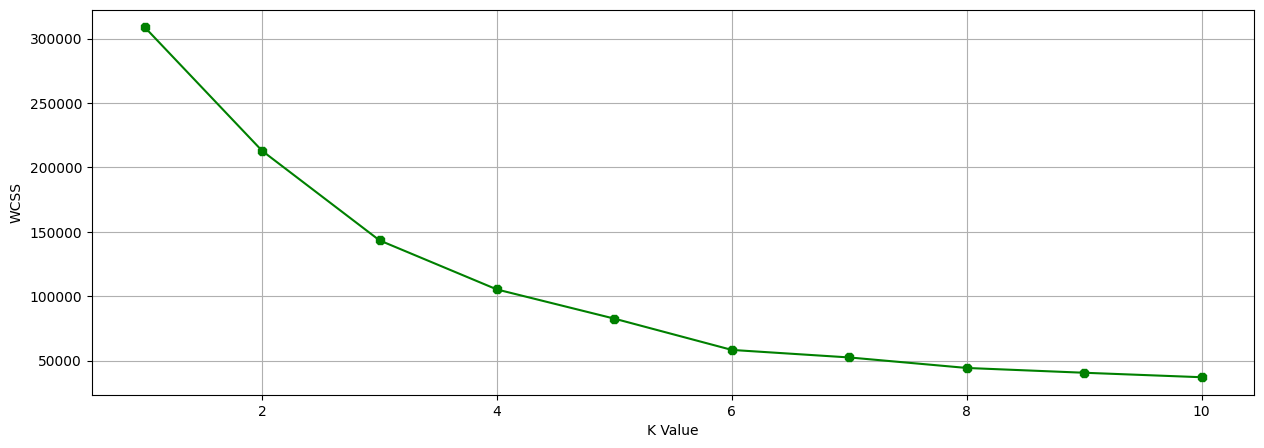

In [20]:
#Choose the number of clusters
wcss = []
for k in range (1,11) : 
    kmeans = KMeans (n_clusters = k, random_state= 00)
    kmeans.fit ( df [['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append (kmeans.inertia_ ) 
plt.figure ( figsize= (15,5))
plt.grid ()
plt.plot ( range(1,11), wcss, marker = '8' , color = 'green' )
plt.xlabel ('K Value')
plt.ylabel ('WCSS')



In [21]:
#k=6
kmeans = KMeans (n_clusters= 6)
label = kmeans.fit_predict (df [['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
print(label)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 0 3 0 5 4 3 0 5 5 5 0 5 5 0 0 0 0 0 5 0 0 5 0 0 0 5 0 0 5 5 0 0 0 0
 0 5 0 5 5 0 0 5 0 0 5 0 0 5 5 0 0 5 0 5 5 5 0 5 0 5 5 0 0 5 0 5 0 0 0 0 0
 5 5 5 5 5 0 0 0 0 5 5 5 1 5 1 2 1 2 1 2 1 5 1 2 1 2 1 2 1 2 1 5 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [22]:
print (kmeans.cluster_centers_)

[[56.15555556 53.37777778 49.08888889]
 [32.69230769 86.53846154 82.12820513]
 [41.68571429 88.22857143 17.28571429]
 [25.27272727 25.72727273 79.36363636]
 [44.14285714 25.14285714 19.52380952]
 [27.         56.65789474 49.13157895]]


In [27]:
#label = kmeans.fit_predict (df [['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df['Cluster'] = label
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


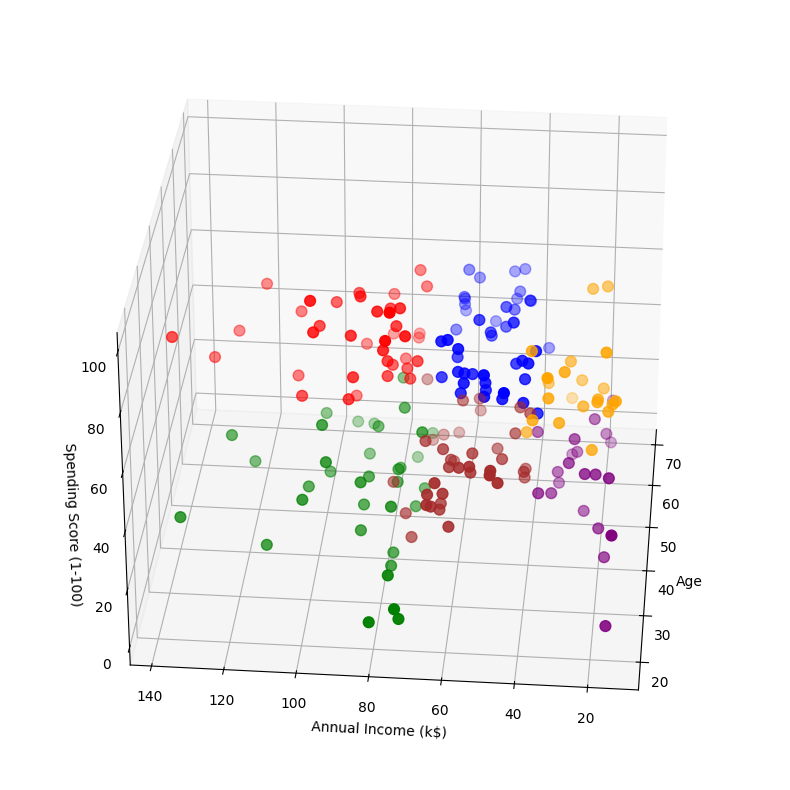

In [26]:
fig = plt.figure(figsize= (20,10))
ax = fig.add_subplot (111, projection = '3d')
ax.scatter ( df.Age[df.Cluster == 0], df['Annual Income (k$)'][df.Cluster == 0] , df['Spending Score (1-100)'] [df.Cluster == 0 ], c= 'blue', s= 60 )
ax.scatter ( df.Age[df.Cluster == 1], df['Annual Income (k$)'][df.Cluster == 1] , df['Spending Score (1-100)'] [df.Cluster == 1 ], c= 'red', s= 60 )
ax.scatter ( df.Age[df.Cluster == 2], df['Annual Income (k$)'][df.Cluster == 2] , df['Spending Score (1-100)'] [df.Cluster == 2 ], c= 'green', s= 60 )
ax.scatter ( df.Age[df.Cluster == 3], df['Annual Income (k$)'][df.Cluster == 3] , df['Spending Score (1-100)'] [df.Cluster == 3 ], c= 'orange', s= 60 )
ax.scatter ( df.Age[df.Cluster == 4], df['Annual Income (k$)'][df.Cluster == 4] , df['Spending Score (1-100)'] [df.Cluster == 4 ], c= 'purple', s= 60 )
ax.scatter ( df.Age[df.Cluster == 5], df['Annual Income (k$)'][df.Cluster == 5] , df['Spending Score (1-100)'] [df.Cluster == 5 ], c= 'brown', s= 60 )
ax.view_init (30,185)

plt.xlabel ( 'Age')
plt.ylabel ('Annual Income (k$)')
ax.set_zlabel ('Spending Score (1-100)')
plt.show()
